# Lesson 4 Assignment:

## Feature Selection

### Author: Dustin Burnham

### Due: 8/4/2019

You are working for a data science consulting company. Your company is approached by a client requesting that you analyze crime data across the United States. At first glance, you notice that the data has 128 attributes and cannot be examined manually. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR. You are tasked to identify which are the most important features or attributes that contribute to crime. 

Generally, such data might be used for predictive policing, where police departments can predict potential criminal activity so they can ensure they are properly staffed and the areas of concern are patrolled accordingly.

1. Read data.
2. Apply three techniques for filter selection: Filter methods, Wrapper methods, Embedded methods.
3. Describe your findings

### 1.  Read Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mutual_info_score
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# Files with features names needed formatting
names = """@attribute state numeric
@attribute county numeric
@attribute community numeric
@attribute communityname string
@attribute fold numeric
@attribute population numeric
@attribute householdsize numeric
@attribute racepctblack numeric
@attribute racePctWhite numeric
@attribute racePctAsian numeric
@attribute racePctHisp numeric
@attribute agePct12t21 numeric
@attribute agePct12t29 numeric
@attribute agePct16t24 numeric
@attribute agePct65up numeric
@attribute numbUrban numeric
@attribute pctUrban numeric
@attribute medIncome numeric
@attribute pctWWage numeric
@attribute pctWFarmSelf numeric
@attribute pctWInvInc numeric
@attribute pctWSocSec numeric
@attribute pctWPubAsst numeric
@attribute pctWRetire numeric
@attribute medFamInc numeric
@attribute perCapInc numeric
@attribute whitePerCap numeric
@attribute blackPerCap numeric
@attribute indianPerCap numeric
@attribute AsianPerCap numeric
@attribute OtherPerCap numeric
@attribute HispPerCap numeric
@attribute NumUnderPov numeric
@attribute PctPopUnderPov numeric
@attribute PctLess9thGrade numeric
@attribute PctNotHSGrad numeric
@attribute PctBSorMore numeric
@attribute PctUnemployed numeric
@attribute PctEmploy numeric
@attribute PctEmplManu numeric
@attribute PctEmplProfServ numeric
@attribute PctOccupManu numeric
@attribute PctOccupMgmtProf numeric
@attribute MalePctDivorce numeric
@attribute MalePctNevMarr numeric
@attribute FemalePctDiv numeric
@attribute TotalPctDiv numeric
@attribute PersPerFam numeric
@attribute PctFam2Par numeric
@attribute PctKids2Par numeric
@attribute PctYoungKids2Par numeric
@attribute PctTeen2Par numeric
@attribute PctWorkMomYoungKids numeric
@attribute PctWorkMom numeric
@attribute NumIlleg numeric
@attribute PctIlleg numeric
@attribute NumImmig numeric
@attribute PctImmigRecent numeric
@attribute PctImmigRec5 numeric
@attribute PctImmigRec8 numeric
@attribute PctImmigRec10 numeric
@attribute PctRecentImmig numeric
@attribute PctRecImmig5 numeric
@attribute PctRecImmig8 numeric
@attribute PctRecImmig10 numeric
@attribute PctSpeakEnglOnly numeric
@attribute PctNotSpeakEnglWell numeric
@attribute PctLargHouseFam numeric
@attribute PctLargHouseOccup numeric
@attribute PersPerOccupHous numeric
@attribute PersPerOwnOccHous numeric
@attribute PersPerRentOccHous numeric
@attribute PctPersOwnOccup numeric
@attribute PctPersDenseHous numeric
@attribute PctHousLess3BR numeric
@attribute MedNumBR numeric
@attribute HousVacant numeric
@attribute PctHousOccup numeric
@attribute PctHousOwnOcc numeric
@attribute PctVacantBoarded numeric
@attribute PctVacMore6Mos numeric
@attribute MedYrHousBuilt numeric
@attribute PctHousNoPhone numeric
@attribute PctWOFullPlumb numeric
@attribute OwnOccLowQuart numeric
@attribute OwnOccMedVal numeric
@attribute OwnOccHiQuart numeric
@attribute RentLowQ numeric
@attribute RentMedian numeric
@attribute RentHighQ numeric
@attribute MedRent numeric
@attribute MedRentPctHousInc numeric
@attribute MedOwnCostPctInc numeric
@attribute MedOwnCostPctIncNoMtg numeric
@attribute NumInShelters numeric
@attribute NumStreet numeric
@attribute PctForeignBorn numeric
@attribute PctBornSameState numeric
@attribute PctSameHouse85 numeric
@attribute PctSameCity85 numeric
@attribute PctSameState85 numeric
@attribute LemasSwornFT numeric
@attribute LemasSwFTPerPop numeric
@attribute LemasSwFTFieldOps numeric
@attribute LemasSwFTFieldPerPop numeric
@attribute LemasTotalReq numeric
@attribute LemasTotReqPerPop numeric
@attribute PolicReqPerOffic numeric
@attribute PolicPerPop numeric
@attribute RacialMatchCommPol numeric
@attribute PctPolicWhite numeric
@attribute PctPolicBlack numeric
@attribute PctPolicHisp numeric
@attribute PctPolicAsian numeric
@attribute PctPolicMinor numeric
@attribute OfficAssgnDrugUnits numeric
@attribute NumKindsDrugsSeiz numeric
@attribute PolicAveOTWorked numeric
@attribute LandArea numeric
@attribute PopDens numeric
@attribute PctUsePubTrans numeric
@attribute PolicCars numeric
@attribute PolicOperBudg numeric
@attribute LemasPctPolicOnPatr numeric
@attribute LemasGangUnitDeploy numeric
@attribute LemasPctOfficDrugUn numeric
@attribute PolicBudgPerPop numeric
@attribute ViolentCrimesPerPop numeric"""

names = names.split("@attribute ")
words = [names[i].split(" ") for i in range(len(names))]
final_names = [word[0] for word in words]
final_names = final_names[1:]

In [3]:
# Read in data with feature names
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
crime = pd.read_csv(data_url, names = final_names)

In [4]:
crime.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [5]:
# Impute missing data with NaN
crime = crime.replace("?", np.float("NaN"))

In [6]:
features = crime.iloc[:,5:-1]
target = crime.iloc[:,-1]

In [7]:
# Replace missing values in features with the mean of that column
features = features.astype("float")
features = features.fillna(features.mean())

In [8]:
features.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


### 2. Apply three techniques for filter selection:
#### 2a. Filter Methods
For a filter method, I will select features that share mutual information.

In [9]:
feature_names = list(features.columns.values)

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency = c_xy)
    return mi

In [10]:
# calculate mutual information
# Select features with highest mutual information scores
mi_scores = [calc_MI(features[i],target,20) for i in feature_names]
chosen_features = np.array(feature_names)[np.array(mi_scores)>0.3]
good_mi_scores = np.array(mi_scores)[np.array(mi_scores)>0.3]
chosen_features_df = pd.DataFrame({'feature name':list(chosen_features), 
                                   'mutual information score': list(good_mi_scores)})
chosen_features_df

,feature name,mutual information score
0,racepctblack,0.334747
1,racePctWhite,0.412856
2,pctWInvInc,0.347753
3,pctWPubAsst,0.338629
4,PctPopUnderPov,0.353337
5,FemalePctDiv,0.334654
6,TotalPctDiv,0.330561
7,PctFam2Par,0.443457
8,PctKids2Par,0.509780
9,PctYoungKids2Par,0.404962


In [11]:
# Select top 7 features from mutual score
chosen_features_df = chosen_features_df.sort_values(by=['mutual information score'], ascending=False)
chosen_features_df = chosen_features_df.reset_index()
filter_features = chosen_features_df.loc[:6,'feature name']

In [12]:
filter_features

0         PctKids2Par
1            PctIlleg
2          PctFam2Par
3        racePctWhite
4    PctYoungKids2Par
5         PctTeen2Par
6      PctPopUnderPov
Name: feature name, dtype: object

#### 2b. Wrapper Methods
I will use a beck selector as a wrapper method to find the predictive features.

In [13]:
# Create selector
estimator = LinearRegression()
stepwise_selector = SFS(estimator, 
    k_features = 10, 
    forward = True, 
    floating = False, 
    cv = 10)

# Fit selector
stepwise_selector = stepwise_selector.fit(features.values, target)

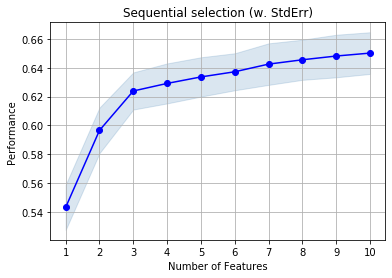

In [14]:
fig = plot_sfs(stepwise_selector.get_metric_dict(), kind = 'std_err')

plt.title('Sequential selection (w. StdErr)')
plt.grid()
plt.show()

In [15]:
# Select top features from the model with 7 features
stepwise_selector.get_metric_dict()[7]

{'feature_idx': (3, 11, 38, 44, 48, 50, 71),
 'cv_scores': array([0.58412048, 0.611148  , 0.59518519, 0.65492387, 0.67436637,
        0.71693634, 0.6864227 , 0.63984191, 0.67052328, 0.59150192]),
 'avg_score': 0.6424970071776099,
 'feature_names': ('3', '11', '38', '44', '48', '50', '71'),
 'ci_bound': 0.03208551889838251,
 'std_dev': 0.04320043008552242,
 'std_err': 0.014400143361840806}

In [16]:
stepwise_selector.get_metric_dict()[7]
pred_feat = list(stepwise_selector.get_metric_dict()[7]['feature_idx'])

In [17]:
pred_feat = list(np.array(feature_names)[pred_feat])
print("Selected Features:\n")
for i in pred_feat:
    print(i)

Selected Features:

racePctWhite
pctUrban
MalePctDivorce
PctKids2Par
PctWorkMom
PctIlleg
HousVacant


In [18]:
# Create model with top 7 features from stepwise
yhat_stepwise = stepwise_selector.transform(features.values)

# Select features
best_subset_index = stepwise_selector.get_metric_dict()[7]['feature_idx']
best_subset_index = list(best_subset_index)
features_subset = features.iloc[:, best_subset_index]

# Create, train linear regression model
estimator_subset = LinearRegression()
estimator_subset.fit(features_subset, target)

# Make predictions
yhat_estimator = estimator_subset.predict(features_subset)

# Check how well the predictions correlate with the actual targets
np.corrcoef([yhat_estimator, target])

array([[1.        , 0.80497629],
       [0.80497629, 1.        ]])

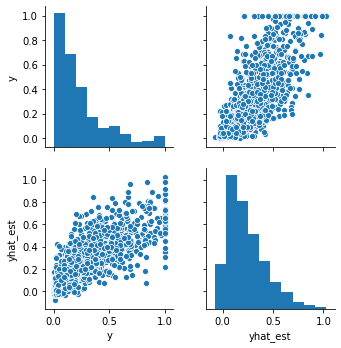

In [19]:
# Plot estimates vs. actual
import seaborn as sns
y_data = pd.DataFrame(data = {'y': target, 'yhat_est': yhat_estimator})
sns.pairplot(y_data)

#### 2c. Embedded Methods

In [20]:
# LASSO
from sklearn import linear_model
linear_model.Lasso()

# Train lasso model
alpha = 0.005 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha = alpha)
clf.fit(features, target)

print(clf.intercept_)
print(clf.score(features, target))

pred_clf = clf.predict(features)

0.4907794725612708
0.6148406166450415


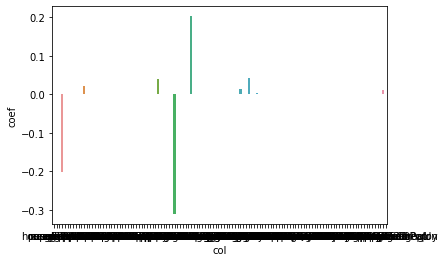

In [21]:
# Plot magnitude of impact of features
lasso = pd.DataFrame({'col': features.columns, 'coef': clf.coef_})
ax = sns.barplot(x = 'col', y = 'coef', data = lasso)

In [22]:
# Show features with top coefficients
lasso.loc[abs(lasso['coef']) > 0.01,:]

,col,coef
3,racePctWhite,-0.200949
11,pctUrban,0.021291
38,MalePctDivorce,0.040113
44,PctKids2Par,-0.310513
50,PctIlleg,0.202717
68,PctPersDenseHous,0.012657
71,HousVacant,0.042454
120,LemasPctOfficDrugUn,0.010896


In [23]:
# Rank features by coefficient
embedded = lasso.loc[abs(lasso['coef']) > 0.01,:]
embedded['coef'] = abs(embedded['coef'])
embedded = embedded.sort_values(by=['coef'], ascending=False)

/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# Select top 7 features
embedded_features = embedded[:7]

In [25]:
embedded_features

,col,coef
44,PctKids2Par,0.310513
50,PctIlleg,0.202717
3,racePctWhite,0.200949
71,HousVacant,0.042454
38,MalePctDivorce,0.040113
11,pctUrban,0.021291
68,PctPersDenseHous,0.012657


In [26]:
# Train linear regression with top 7 lasso features
lm = linear_model.LinearRegression()
lm.fit(crime[embedded_features['col']], target)

# Make predictions with model
pred_lm = lm.predict(crime[embedded_features['col']])

In [27]:
np.corrcoef(pred_lm, pred_clf)

array([[1.        , 0.98473865],
       [0.98473865, 1.        ]])

### Summary:

In [28]:
list(embedded_features['col'])

['PctKids2Par',
 'PctIlleg',
 'racePctWhite',
 'HousVacant',
 'MalePctDivorce',
 'pctUrban',
 'PctPersDenseHous']

In [29]:
comparison = pd.DataFrame({'Filter Features':sorted(list(filter_features)),
                          'Wrapper Features':sorted(pred_feat),
                          'Embedded Features':sorted(list(embedded_features['col']))})

In [30]:
comparison

,Filter Features,Wrapper Features,Embedded Features
0,PctFam2Par,HousVacant,HousVacant
1,PctIlleg,MalePctDivorce,MalePctDivorce
2,PctKids2Par,PctIlleg,PctIlleg
3,PctPopUnderPov,PctKids2Par,PctKids2Par
4,PctTeen2Par,PctWorkMom,PctPersDenseHous
5,PctYoungKids2Par,pctUrban,pctUrban
6,racePctWhite,racePctWhite,racePctWhite


### Summary:

The ultimate goal of this investigation is to report to the client which factors are the most helpful in predicting the crime of an area.  I tried three different techniques for feature selection:

1. Filter Method: Mutual Information
2. Wrapper Method: Stepwise Selection
3. Embedded Method: Lasso Regression

For the first method, I will calculate the mutual information between the features and the target.  Mutual information is better than general correlation, because mutual information can contain information about linear AND non-linear associations.  For the wrapper method, I chose stepwise because it seemed like a good middle ground between forward and backward selection.  Finally the embedded method I will use is the lasso regresion method.  For all three, I get quantities that can be used to rank the impact of the features on the target.  The mutual information is a score, the stepwise process selects the top 7 features (I set 7), and lasso regression creates coefficients for each feature where the larger the magnitude, the larger the impact.  Taking all of these into account, I came up with a list of the top 7 features for each method.  All three methods share similar top features.  The factors that were important in all three methods were PctFam2Par, PctIlleg, PctKids2Par, racePctWhite, and a few others.  Notablly there is some difference between the filter methods and the other two, but simply measuring the information two variables share does not necessarily tell us predictive ability.  The wrapper and embedded methods both involve optimizing the features to fit a linear regression model, so I think these two methods are better for feature selection.  These two methods produced very similar results.  The only difference in the top 7 features were the PctWorkMom and PctPersDenseHous features.  The fact that both results are so similar gives me confidence in reporting the features selected by stepwise/lasso to the client.